<a href="https://colab.research.google.com/github/mrkofficial2/FM-Public/blob/main/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 29.3 MB/s 
     |████████████████████████████████| 108 kB 95.0 MB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
     |████████████████████████████████| 604 kB 65.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [2]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 1.82s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [8]:
# list them
!ls -all

total 3520
drwxrwxr-x 1 root root    4096 Sep 27 10:30 .
drwxr-xr-x 1 root root    4096 Sep 27 10:28 ..
-rw-r--r-- 1 root root   59898 Sep 17 06:20 chinese.jpg
drwxr-xr-x 4 root root    4096 Sep 22 13:41 .config
-rw-r--r-- 1 root root   97910 Sep 17 06:20 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Sep 17 06:20 english.png
-rw-r--r-- 1 root root  487995 Sep 17 06:20 example2.png
-rw-r--r-- 1 root root  127454 Sep 17 06:20 example3.png
-rw-r--r-- 1 root root  488641 Sep 17 06:20 example.png
-rw-r--r-- 1 root root  168376 Sep 17 06:20 french.jpg
-rw-r--r-- 1 root root   42159 Sep 17 06:20 japanese.jpg
-rw-r--r-- 1 root root  225531 Sep 17 06:20 korean.png
drwxr-xr-x 1 root root    4096 Sep 22 13:42 sample_data
-rw-r--r-- 1 root root   82229 Sep 17 06:20 thai.jpg
-rw-r--r-- 1 root root   34706 Sep 17 06:20 width_ths.png


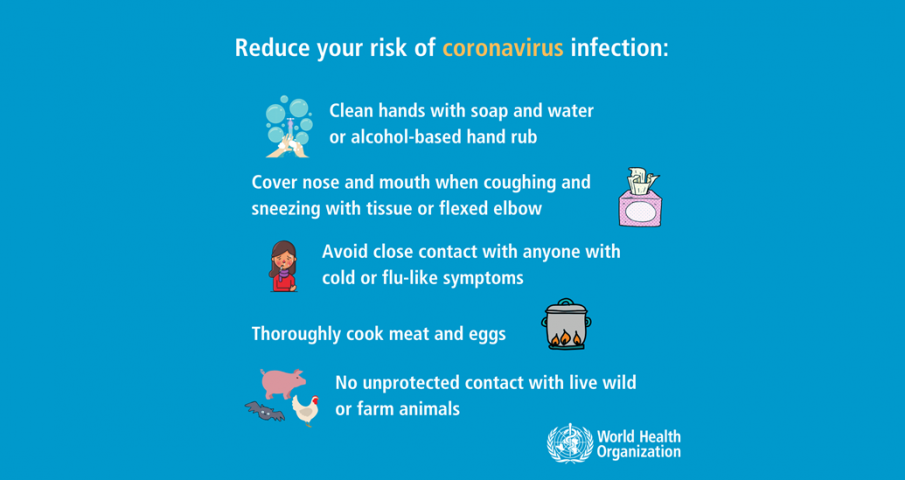

In [4]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("english.png")
im

In [5]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('english.png')
bounds

[([[231, 32], [674, 32], [674, 64], [231, 64]],
  'Reduce your risk of coronavirus infection:',
  0.9371086739538037),
 ([[326, 98], [598, 98], [598, 124], [326, 124]],
  'Clean hands with soap and water',
  0.9706381416341407),
 ([[328, 124], [542, 124], [542, 148], [328, 148]],
  'or alcohol-based hand rub',
  0.8901542738181009),
 ([[246, 169], [595, 169], [595, 196], [246, 196]],
  'Cover nose and mouth when coughing and',
  0.9659280301874148),
 ([[245, 194], [546, 194], [546, 222], [245, 222]],
  'sneezing with tissue or flexed elbow',
  0.8517948737970359),
 ([[320, 240], [624, 240], [624, 266], [320, 266]],
  'Avoid close contact with anyone with',
  0.8957650294276052),
 ([[318, 266], [528, 266], [528, 292], [318, 292]],
  'cold or flu-like symptoms',
  0.7669339961656335),
 ([[248, 322], [510, 322], [510, 348], [248, 348]],
  'Thoroughly cook meat and eggs',
  0.8505019535270802),
 ([[332, 370], [640, 370], [640, 396], [332, 396]],
  'No unprotected contact with live wild',
 

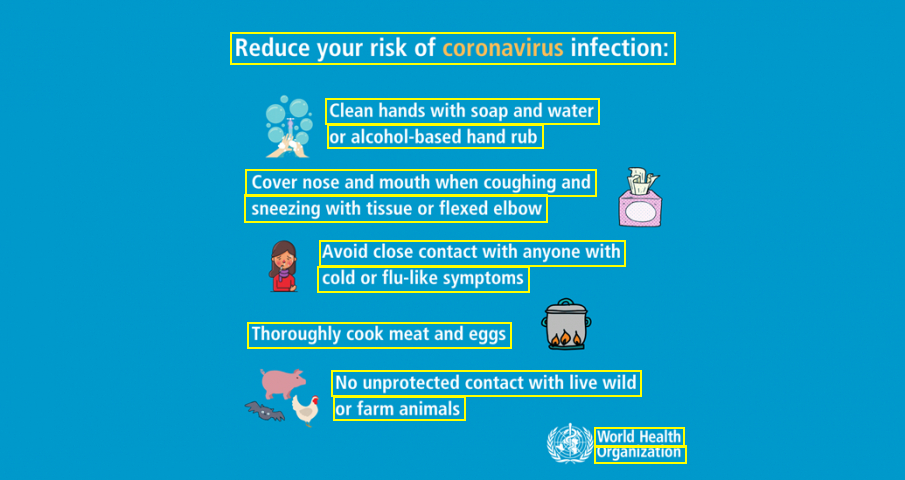

In [7]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)